In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("/content/books_data.csv")
print(data.head())

   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating  
0  J.K. Rowling/Mary GrandPré           4.57  
1  J.K. Rowling/Mary GrandPré           4.49  
2                J.K. Rowling           4.42  
3  J.K. Rowling/Mary GrandPré           4.56  
4  J.K. Rowling/Mary GrandPré           4.78  


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


In [3]:

data.columns

Index(['bookID', 'title', 'authors', 'average_rating'], dtype='object')

In [7]:
data.describe()



,bookID
count,11127.000000
mean,21310.938887
std,13093.358023
min,1.000000
25%,10287.000000
50%,20287.000000
75%,32104.500000
max,45641.000000


Distribution of average ratings of all the books:

In [8]:
fig = px.histogram(data, x='average_rating',
                   nbins=30,
                   title='Distribution of Average Ratings')
fig.update_xaxes(title_text='Average Rating')
fig.update_yaxes(title_text='Frequency')
fig.show()

Total number of books per author:

In [9]:
top_authors = data['authors'].value_counts().head(10)
fig = px.bar(top_authors, x=top_authors.values, y=top_authors.index, orientation='h',
             labels={'x': 'Number of Books', 'y': 'Author'},
             title='Number of Books per Author')
fig.show()

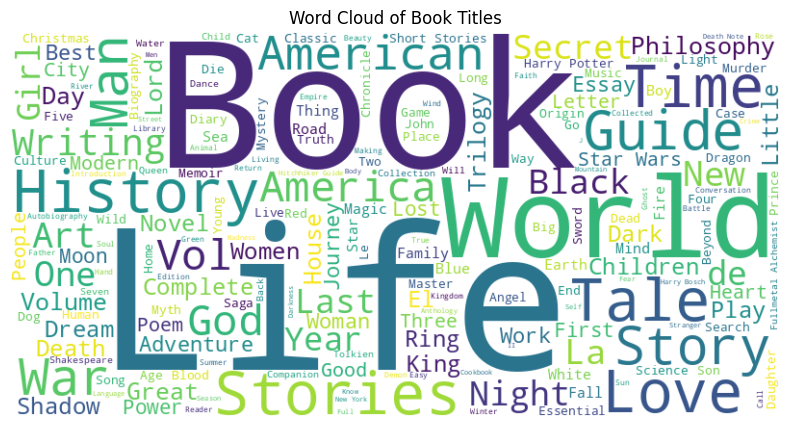

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all book titles into a single string
text = ' '.join(data['title'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Book Titles')
plt.show()


The average rating column in an object data type in the dataset.converting it into numeric:

In [11]:
# Convert 'average_rating' to a numeric data type
data['average_rating'] = pd.to_numeric(data['average_rating'],
                                       errors='coerce')

To consider book content for recommendations, we’ll use the book titles and authors. Combining these features into a single text feature:

In [12]:
# Create a new column 'book_content' by combining 'title' and 'authors'
data['book_content'] = data['title'] + ' ' + data['authors']

Now, we will transform the text-based features into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization:
It converts text data into a numerical representation suitable for recommendation algorithms.

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['book_content'])

I'm using a simple content-based recommendation system algorithm based on the cosine similarity between books:

In [14]:
# Compute the cosine similarity between books
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Defining a function to recommend books based on user preferences:

In [17]:
def recommend_books(book_title, cosine_sim=cosine_sim):
    # Checking if the book exists
    if book_title not in data['title'].values:
        return f"'{book_title}' not found in dataset."

    # Getting the index of the book that matches the title
    idx = data.index[data['title'] == book_title][0]

    # Getting the cosine similarity scores for all books with this book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # To Get the top 10 most similar books (excluding the input book)
    sim_scores = sim_scores[1:11]

    # To Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Returning the top 10 recommended books
    return data['title'].iloc[book_indices]


This function will take a book title as input and recommend books with high cosine similarity. Now, let’s test the recommendation system by providing a book title and getting recommendations:

In [19]:
book_title = "Taxation of Mineral Rents"
recommended_books = recommend_books(book_title)
print(recommended_books)

6242          Mythology: The DC Comics Art of Alex Ross
691                                  On Death and Dying
4721                                            Marvels
4722                                            Marvels
411                                         The Odyssey
7839            Cast a Yellow Shadow (Mac McCorkle  #2)
8807    The Wheel of Life: A Memoir of Living and Dying
1562                        Amber Brown Is Not a Crayon
4726                                       Kingdom Come
1561                     Amber Brown Is Green With Envy
Name: title, dtype: object
